# Trabalho Prático 1
## Grupo:
* Gabriel Alves Reis, 
* Gabriel Castelo Branco Rocha Alencar Pinto, 2020006523
* Samuel Brísio, 


In [832]:
%pip3 install pandas

UsageError: Line magic function `%pip3` not found.


1- Envoltória Convexa (Gift Wrapping ??)
- Implementar primitiva de posição relativa de semiretas
- Sorted (default do python) com nossa primitiva
- Algoritmo da Envoltória (Gift Wrapping)
    - (conj. de pontos) -> (conj. de pontos)
- função para visualizar a envoltória

In [833]:
# imports

In [834]:
class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __lt__(self, b):
        A = (self.x)*(b.y)
        B = (self.y)*(b.x)
        return (A - B) > 0
    
    def __sub__(self, b):
        return Dot(self.x - b.x, self.y - b.y)
    
    def __add__(self, b):
        return Dot(self.x + b.x, self.y + b.y)

    def __repr__(self):
        return f'({self.x}, {self.y})'

In [835]:
def sortDotsByPolarAngle(dotsParam):
    dots = dotsParam.copy()
    anchor = dots[0]
    indx = 0
    anchor_indx = indx
    # find anchor
    for p in dots:
        if p.y < anchor.y :
            anchor = p
            anchor_indx = indx
        elif (p.y == anchor.y and p.x < anchor.x) :
            anchor = p  
            anchor_indx = indx
        indx += 1

    # normalize dots
    norm_dots = []
    dots.pop(anchor_indx)
    for dot in dots:
        norm_dots.append(dot - anchor)
    
    norm_dots.sort()

    sorted_dots = [anchor]
    for dot in norm_dots:
        sorted_dots.append(dot + anchor)

    return sorted_dots

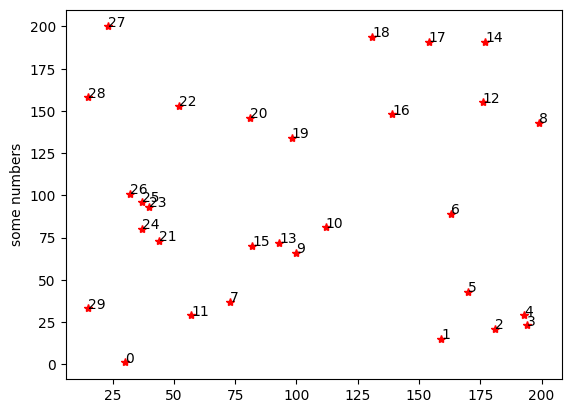

In [836]:
import matplotlib.pyplot as plt
from random import randint 
import random

dot_list = []

# random.seed(16)
for i in range(30):
    x = randint(0,200)
    y = randint(0,200)
    a = Dot(x, y)
    dot_list.append(a)

x = []
y = []

for e in sortDotsByPolarAngle(dot_list):
    x.append(e.x)
    y.append(e.y)

fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')
plt.show()


# Envoltória

In [837]:
def isLeftTurn(a, b, c):
    B = b - a
    C = c - a

    term1 = (B.x)*(C.y)
    term2 = (B.y)*(C.x)
    return (term1 - term2) > 0

def Graham(DotListParam):
    DotList = DotListParam
    stack = []
    stack.append(DotList[0])
    stack.append(DotList[1])
    stack.append(DotList[2])

    for i in range(3, len(DotList), 1):
        laster = len(stack) - 1
        while not isLeftTurn(stack[laster - 1], stack[laster], DotList[i]):
            stack.pop()
            laster -= 1
        stack.append(DotList[i])

    return stack


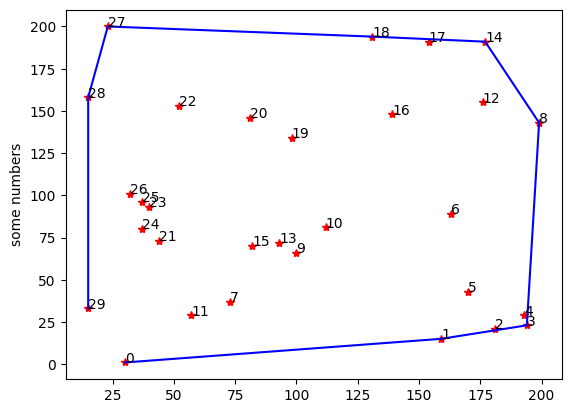

In [838]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r*')

for i, txt in enumerate(range(len(x))):
    ax.annotate(txt, (x[i], y[i]))
plt.ylabel('some numbers')

x_envolt = []
y_envolt = []

sorted_list = sortDotsByPolarAngle(dot_list)

for e in Graham(sorted_list):
    x_envolt.append(e.x)
    y_envolt.append(e.y)


ax.plot(x_envolt, y_envolt, 'b-')
plt.show()